#### Постановка задачи
Провести исследование на основе данных о зарплатах в сфере Data Science за 2020–2022 годы и получить некоторые выводы, которые необходимо проверить с помощью статистического тестирования, и ответить на вопрос: являются ли данные выводы статистически значимыми.

#### 1. Загрузка и обработка данных 

In [1]:
# выгружаем основных библиотеки
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats

In [5]:
# выгружаем данные из csv в df
data = pd.read_csv('ds_salaries.csv', index_col='Unnamed: 0')

In [6]:
display(data)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [10]:
# проверям датасет на количество дубликатов
print(f'Количество дубликатов в датасете: {data[data.duplicated()].shape[0]}')

Количество дубликатов в датасете: 42


In [12]:
# удаляем дубликаты из датасета
data = data.drop_duplicates()
print(f'Размер датасета после удаления дубkикатов: {data.shape}')

Размер датасета после удаления дубkикатов: (565, 11)


In [13]:
# выгружаем информацию по датасету
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           565 non-null    int64 
 1   experience_level    565 non-null    object
 2   employment_type     565 non-null    object
 3   job_title           565 non-null    object
 4   salary              565 non-null    int64 
 5   salary_currency     565 non-null    object
 6   salary_in_usd       565 non-null    int64 
 7   employee_residence  565 non-null    object
 8   remote_ratio        565 non-null    int64 
 9   company_location    565 non-null    object
 10  company_size        565 non-null    object
dtypes: int64(4), object(7)
memory usage: 53.0+ KB


**Выводы:**
* в столбцах нет пропусков данных;
* проведен замер дубликатов (42) и удаление дубликтов из датасета. После удаления размер датасета составил 565х11;
* к числовым признакам относятся: 
  * год (work_year); 
  * з/п в валюте (salary);
  * з/п в долларах (salary_in_usd);
  * и объем удаленной работы (remote_ratio);
* к категориальным признакам относятся: 
  * опыт работы в должности (experience_level);
  * тип трудоустройства (employment_type);
  * роль (job_title);
  * валюта (salary_currency);
  * страна проживания сотрудника (employee_residence);
  * страна головного офиса (company_location);
  * и размер компании (company_size);
* неинформативными признаками являются з/п в валюте () и валюта (), так как невозможно сверить з/п в разных валютах, для этого у нас есть столбец з/п в долларах. Соответственно данные 2 столбца можно удалить из датасета.


In [19]:
# удаляем неинформативные столбцы
data = data.drop(labels=['salary', 'salary_currency'], axis=1)

In [20]:
# основные стат характеристики для числовых данных
data.describe()

,work_year,salary_in_usd,remote_ratio
count,565.000000,565.000000,565.000000
mean,2021.364602,110610.343363,69.911504
std,0.698138,72280.702792,40.900666
min,2020.000000,2859.000000,0.000000
25%,2021.000000,60757.000000,50.000000
50%,2021.000000,100000.000000,100.000000
75%,2022.000000,150000.000000,100.000000
max,2022.000000,600000.000000,100.000000


In [18]:
# основные стат характеристики для категориальных данных
data.describe(include='object')

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,565,565,565,565,565,565,565
unique,4,4,50,17,57,50,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,243,546,130,359,295,318,290


#### 2. Разведывательный анализ данных
##### 2.1. Визуальный анализ данных

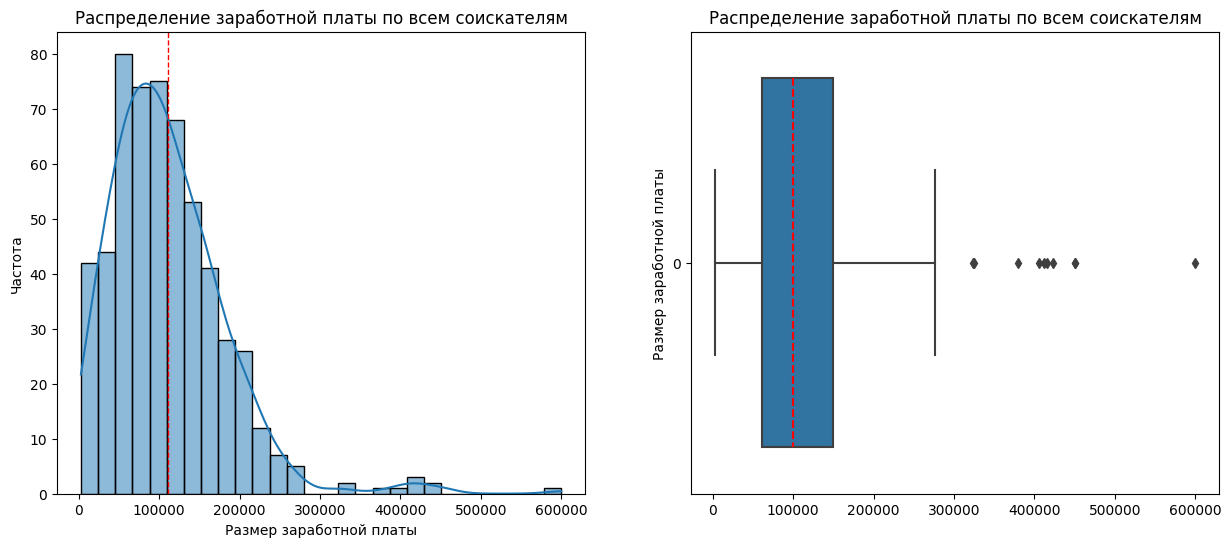

In [28]:
# графики распределения годовой заработной платы по всем соискателям
fig, axes = plt.subplots(1, 2, figsize=(15,6))

sns.histplot(data['salary_in_usd'], kde=True, ax=axes[0])
axes[0].set(xlabel='Размер заработной платы', ylabel='Частота')
axes[0].set_title('Распределение заработной платы по всем соискателям')
axes[0].axvline(data['salary_in_usd'].mean(), color='red', linestyle='--', linewidth=1)

sns.boxplot(data['salary_in_usd'], orient='h', ax=axes[1], medianprops = {'color': 'red', 'linestyle': '--'})
axes[1].set_title('Распределение заработной платы по всем соискателям')
axes[1].set(ylabel='Размер заработной платы')

plt.show()

In [30]:
data['salary_in_usd'].describe().round(2)

count       565.00
mean     110610.34
std       72280.70
min        2859.00
25%       60757.00
50%      100000.00
75%      150000.00
max      600000.00
Name: salary_in_usd, dtype: float64

**Вывод:** по итогам визуального анализа видим, что распределение заработной платы отличается от нормального, наблюдаются выбросы в данных. Среднее значение годовой заработной платы составляет 110 тыс. долларов

##### Построим графики распределения по категориальным признакам

In [46]:
# подчетаем количество значений по признаку "Опыт работы в должности"
experience_level = data['experience_level'].value_counts()
experience_level

SE    243
MI    208
EN     88
EX     26
Name: experience_level, dtype: int64

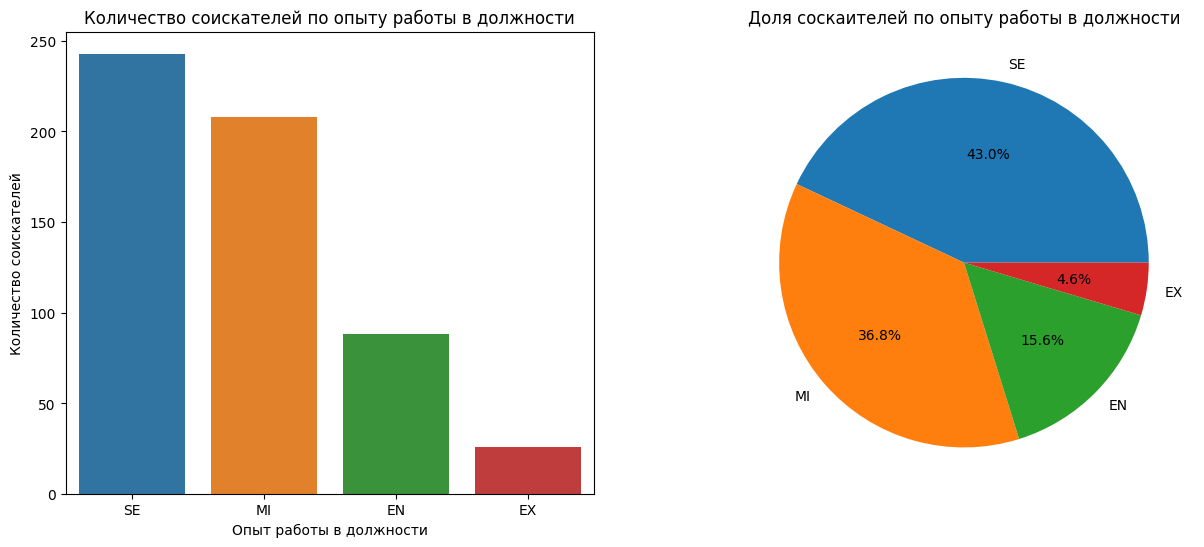

In [52]:
# построим график частоты и круговую диаграмму для признака "Опыт работы в должности"
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x=experience_level.index, y=experience_level.values, ax=axes[0])
axes[0].set(xlabel='Опыт работы в должности', ylabel='Количество соискателей')
axes[0].set_title('Количество соискателей по опыту работы в должности')

axes[1].pie(
    experience_level.values,
    labels=experience_level.index,
    autopct='%.1f%%')
axes[1].set_title('Доля соскаителей по опыту работы в должности');

**Вывод:** наибольшее количество соискателей с опытом работы "Senior-level/Expert", доля данной группы составляет 43%. Наименьшую долю занимают соискатели с опытом работы "Executive-level/Director" (4.6%)

In [50]:
# подчетаем количество значений по признаку "Тип трудоустройства"
employment_type = data['employment_type'].value_counts()
employment_type

FT    546
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

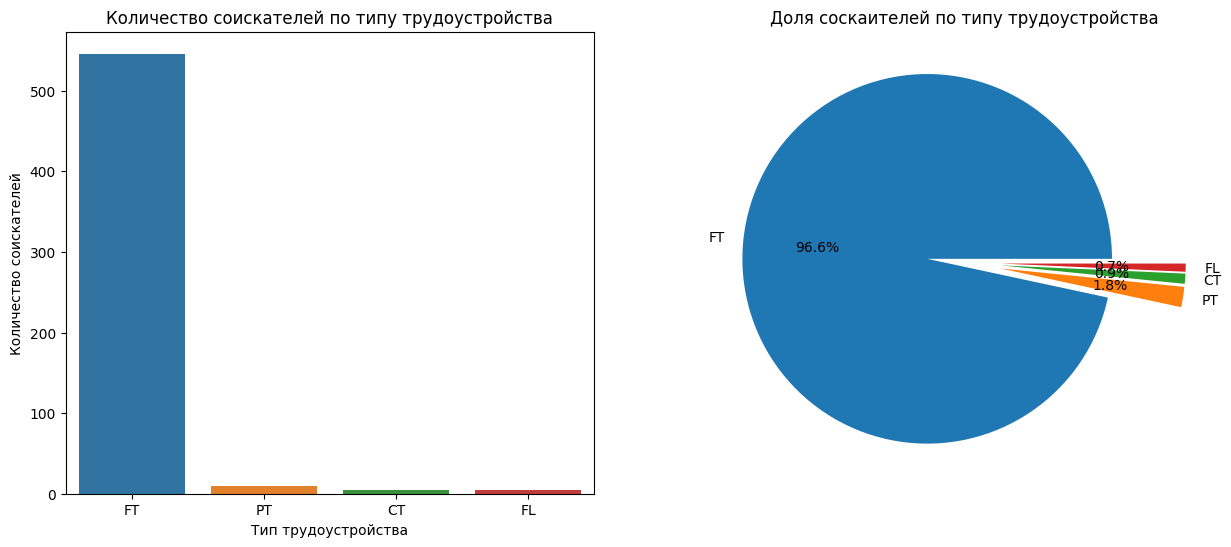

In [56]:
# построим график частоты и круговую диаграмму для признака "Тип трудоустройства"
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x=employment_type.index, y=employment_type.values, ax=axes[0])
axes[0].set(xlabel='Тип трудоустройства', ylabel='Количество соискателей')
axes[0].set_title('Количество соискателей по типу трудоустройства')

axes[1].pie(
    employment_type.values,
    labels=employment_type.index,
    autopct='%.1f%%',
    explode = [0.2, 0.2, 0.2, 0.2])
axes[1].set_title('Доля соскаителей по типу трудоустройства');

**Вывод:** преобладающее большинство соискателей с типом трудоустройства "Полный рабочий день", доля данной группы составляет 96.6%. Остальные группы занимают менее 2% каждая. Так же можно сделать вывод о том, что данный показатель по своей сути тоже является неинформативным, так как 96.6% соискателей относятся к 1 руппе.

In [70]:
# посчитаем количество уникальных должностей 
data['job_title'].nunique()

50

In [60]:
# подчетаем количество значений по признаку "Тип трудоустройства" для ТОП-10 должностей
job_title = data['job_title'].value_counts().nlargest(10).sort_values(ascending=False)
job_title

Data Scientist                130
Data Engineer                 121
Data Analyst                   82
Machine Learning Engineer      39
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Big Data Engineer               8
Machine Learning Scientist      8
Principal Data Scientist        7
Name: job_title, dtype: int64

In [66]:
print('Доля ТОП-10 должностей в общем количестве соискателей {:.1f} %'.format(job_title.sum() / data.shape[0] * 100))

Доля ТОП-10 должностей в общем количестве соискателей 76.8 %


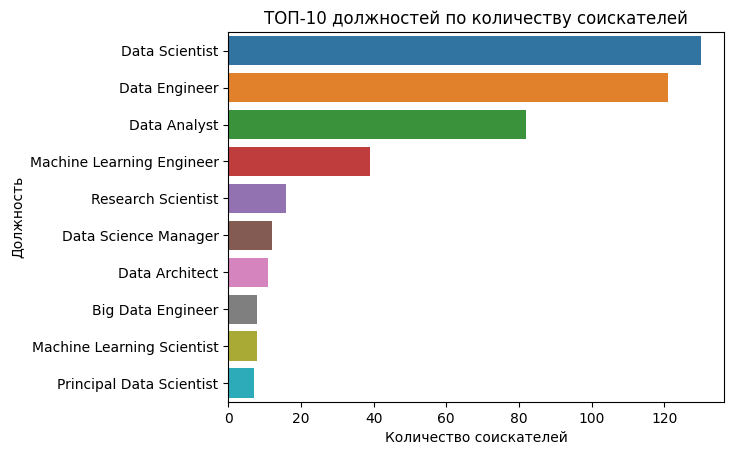

In [68]:
# визуализируем результаты анализа
fig = plt.plot(figsize=(15, 6))

barplot = sns.barplot(y=job_title.index, x=job_title.values)
barplot.set(ylabel='Должность', xlabel='Количество соискателей')
barplot.set_title('ТОП-10 должностей по количеству соискателей');

**Вывод:** всего в датасете представлено 50 уникальных должностей. По результатам анализа видно, что интересующие нас должности Data Scientist и Data Engineer находятся в ТОП-10 на первом и втором месте соответственно по количеству соискателей.

In [71]:
# посчитаем количество уникальных стран проживания соискателей
data['employee_residence'].nunique()

57

In [72]:
# подчетаем количество значений по признаку "Страны проживания соискателей"
employee_residence = data['employee_residence'].value_counts().nlargest(10).sort_values(ascending=False)
employee_residence

US    295
GB     43
IN     30
CA     27
DE     24
FR     18
ES     15
GR     12
JP      7
PT      6
Name: employee_residence, dtype: int64

In [73]:
print('Доля ТОП-10 стран проживания в общем количестве соискателей {:.1f} %'.format(employee_residence.sum() / data.shape[0] * 100))

Доля ТОП-10 стран проживания в общем количестве соискателей 84.4 %


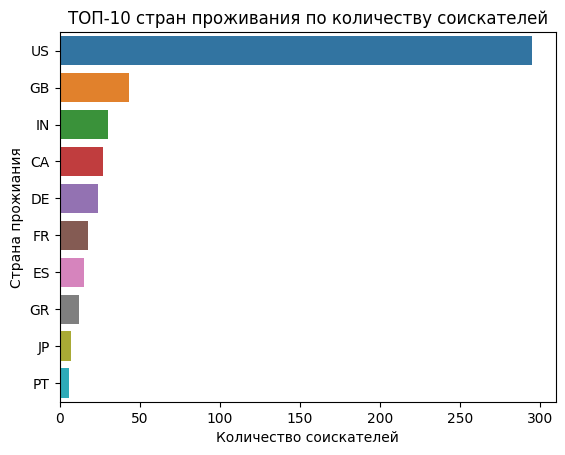

In [74]:
# визуализируем результаты анализа
fig = plt.plot(figsize=(15, 6))

barplot = sns.barplot(y=employee_residence.index, x=employee_residence.values)
barplot.set(ylabel='Страна прожиания', xlabel='Количество соискателей')
barplot.set_title('ТОП-10 стран проживания по количеству соискателей');

**Вывод:** всего в датасете представлено 57 уникальных стран проживания соискателей. По результатам анализа видно, что наибольшее количество соискателей проживает в США, на втором месте в Соединенном Королевстве и на третьем в Индии.

In [75]:
# посчитаем количество уникальных стран главного офиса
data['company_location'].nunique()

50

In [76]:
# подчетаем количество значений по признаку "Страны главного офиса"
company_location = data['company_location'].value_counts().nlargest(10).sort_values(ascending=False)
company_location

US    318
GB     46
CA     28
DE     27
IN     24
FR     15
ES     14
GR     10
JP      6
NL      4
Name: company_location, dtype: int64

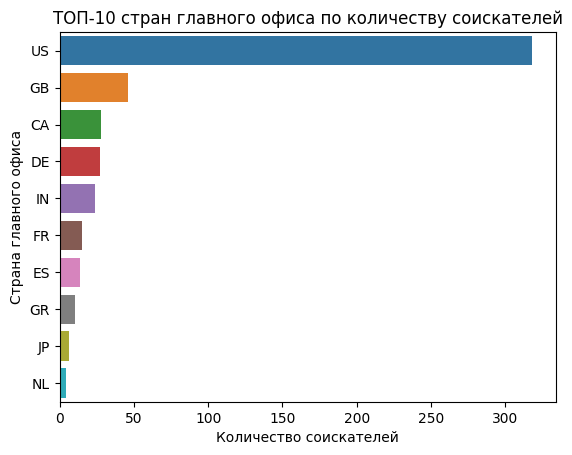

In [77]:
# визуализируем результаты анализа
fig = plt.plot(figsize=(15, 6))

barplot = sns.barplot(y=company_location.index, x=company_location.values)
barplot.set(ylabel='Страна главного офиса', xlabel='Количество соискателей')
barplot.set_title('ТОП-10 стран главного офиса по количеству соискателей');

**Вывод:** всего в датасете представлено 50 уникальных стран расположения главного офиса компании. По результатам анализа видно, что наибольшее количество соискателей работают на компании, расположенные в США, на втором месте в Соединенном Королевстве и на третьем в Канаде.

##### Проанализируем влияение анализируемых факторов на заработную плату соискателей

In [78]:
# Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist
# подготовим отдельный датасет с учетом требуемых должностей
data_ds = data[data['job_title'] == 'Data Scientist']

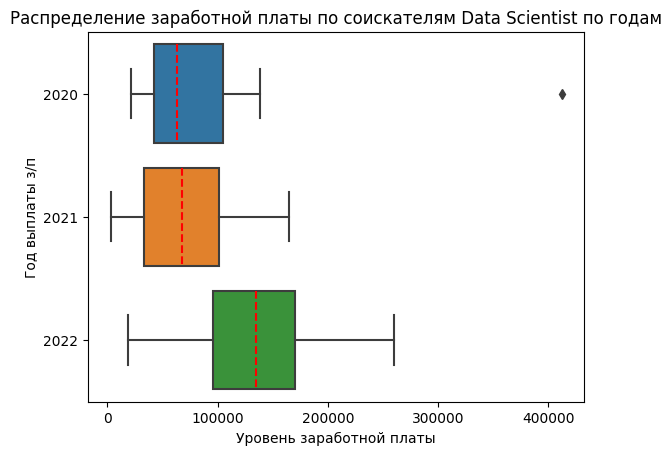

In [93]:
# графики распределения годовой заработной платы по соискателям Data Scientist в зависимости от года выплаты з/п
fig = plt.plot(figsize=(12,4))

boxplot = sns.boxplot(data=data_ds, x = 'salary_in_usd', y = 'work_year', orient='h', medianprops = {'color': 'red', 'linestyle': '--'})
boxplot.set_title('Распределение заработной платы по соискателям Data Scientist по годам')
boxplot.set(ylabel='Год выплаты з/п', xlabel='Уровень заработной платы');

In [84]:
data_ds.groupby('work_year')['salary_in_usd'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2020,21.0,85970.52,81436.65,21669.0,42197.00,62726.0,105000.00,412000.0
2021,44.0,70215.77,45843.82,2859.0,32793.75,67233.5,100922.75,165000.0
2022,65.0,131366.94,55785.24,18442.0,95550.00,135000.0,170000.00,260000.0


**Вывод:** распределение заработной платы различно по годам, то есть мы можем наблюдать зависимость выплаты заработной платы из года в год. Для определения статистической значимости необходимо провести статистические тесты.

In [87]:
# Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году
# подгтовим отдельный датасет с учетом требуемых должностей и года выплаты з/п
data_ds_de = data[((data['job_title']=='Data Scientist') | (data['job_title']=='Data Engineer')) 
                  & (data['work_year']==2022)]

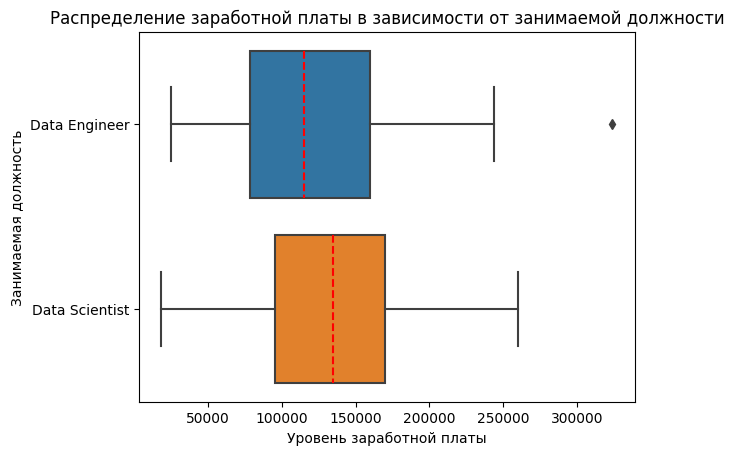

In [92]:
# графики распределения годовой заработной платы по соискателям в зависимости от занимаемой должности в 2022 году
fig = plt.plot(figsize=(12,4))

boxplot = sns.boxplot(data_ds_de, x = 'salary_in_usd', y = 'job_title', 
                      orient='h', medianprops = {'color': 'red', 'linestyle': '--'})
boxplot.set_title('Распределение заработной платы в зависимости от занимаемой должности')
boxplot.set(ylabel='Занимаемая должность', xlabel='Уровень заработной платы');

In [94]:
data_ds_de.groupby('job_title')['salary_in_usd'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
Data Engineer,79.0,124651.78,57846.84,25000.0,78526.0,115000.0,160040.0,324000.0
Data Scientist,65.0,131366.94,55785.24,18442.0,95550.0,135000.0,170000.0,260000.0


**Вывод:** распределение заработной платы различается в заивисимости от занимаемой должности соискателя, то есть мы можем наблюдать зависимость выплаты заработной платы в заивисимости от занимаемой должности. При этом видно, что специалисты Data Scientist имею более высокие границы ящика, чем специалисты Data Engineer. Наблюдается, что макс значение у специалистов Data Engineer выше, однако на графике видно, что это единичный выброс данных. Для определения статистической значимости необходимо провести статистические тесты.

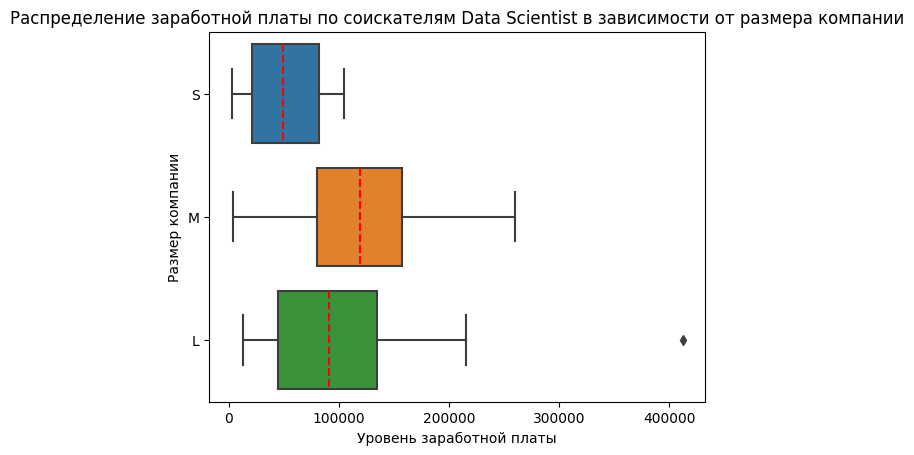

In [99]:
# Как соотносятся зарплаты специалистов Data Scientist в компаниях различных 
# за основу возьмем уже готовый датасет data_ds, отфильтрованный по должности Data Scientist
fig = plt.plot(figsize=(15,6))

boxplot = sns.boxplot(data=data_ds, x = 'salary_in_usd', y = 'company_size', 
                      orient='h', medianprops = {'color': 'red', 'linestyle': '--'}, 
                      order=['S', 'M', 'L'])
boxplot.set_title('Распределение заработной платы по соискателям Data Scientist в зависимости от размера компании')
boxplot.set(ylabel='Размер компании', xlabel='Уровень заработной платы');


In [97]:
data_ds.groupby('company_size')['salary_in_usd'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
L,43.0,102743.42,73254.10,13400.0,45240.5,90734.0,135000.0,412000.0
M,66.0,120080.58,56347.79,4000.0,80000.0,119529.5,157500.0,260000.0
S,21.0,51925.76,33216.29,2859.0,21669.0,49268.0,82500.0,105000.0


**Вывод:** распределение заработной платы различно от компании к компании разных размеров, то есть мы можем наблюдать зависимость выплаты заработной платы от размера компании. По результатам анализа видно, что компании среднего размера (М) выплачиваем более высокую заработную плату сотрудникам. Для определения статистической значимости необходимо провести статистические тесты.

In [101]:
# Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании
# подготовим таблицу сопряженности
cross_tab = pd.crosstab(index=data_ds_de['job_title'], columns=data_ds_de['company_size'])
cross_tab

company_size,L,M,S
job_title,,,
Data Engineer,7,71,1
Data Scientist,13,51,1


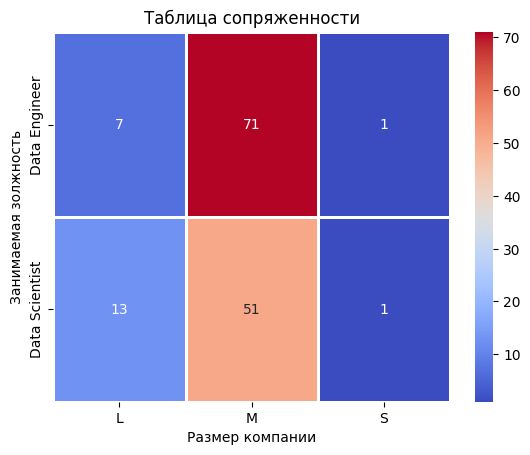

In [105]:
ax = sns.heatmap(cross_tab, annot=True, linewidths=1, fmt='.0f', cmap='coolwarm')
ax.set(xlabel='Размер компании', ylabel='Занимаемая золжность')
plt.title('Таблица сопряженности')
plt.show();

**Вывод:** Согласно данным, количество специаоистов Data Engineer больше в средних компания, и наборот количество специалистов Data Scientist больше в крупных компаниях. Для определения статистической значимости необходимо провести статистические тесты.

**Итоговый вывод:**
* по итогам визуального анализа данных можно сделать вывод, что на уровень заработной платы оказывают влияние ряд факторов: занимаемая должность сосискателя, размер компании, а так же временной период (от года к году). И существует взаимосвязь между количеством специалистов и размером компании.

##### 2.2. Статистический анализ данных 

In [106]:
# функция для принятия решения о нормальности
alpha = 0.05
def decision_normality(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Распределение отлично от нормального'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. Распределение является нормальным'.format(alpha))

# функция для принятия решения об отклонении нулевой гипотезы
def decision_hypothesis(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу в пользу альтернативной.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

**Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?**  
*Нулевая гипотеза* ($H_0$): размер заработной платы у специалистов Data Scientist не меняется от года к году
$$ H_0 : μ_1 = μ_2 = μ_3 $$
*Альтернативная гипотеза *($H_1$): размер заработной платы у специалистов Data Scientist меняется от года к году
$$ H_1 : μ_1 \neq μ_2 \neq μ_3$$

**Проверка на нормальность:**  
С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.   
*Нулевая гипотеза* ($H_0$): распределение данные является нормальным.  
*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.


In [107]:
# значения заработных плат по годам
salary_20 = data_ds.loc[data_ds['work_year']==2020, 'salary_in_usd']
salary_21 = data_ds.loc[data_ds['work_year']==2021, 'salary_in_usd']
salary_22 = data_ds.loc[data_ds['work_year']==2022, 'salary_in_usd']

# проводим тест Шапиро-Уилка
print('2020 год:')
result = stats.shapiro(salary_20)
decision_normality(result[1])

print('2021 год:')
result = stats.shapiro(salary_21)
decision_normality(result[1])

print('2022 год:')
result = stats.shapiro(salary_22)
decision_normality(result[1])


2020 год:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
2021 год:
p-value = 0.107
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
2022 год:
p-value = 0.676
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Размер сзаработной платы»? — Количественный.
* Сколько сравниваемых групп? — Три.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет, по одной из групп распределение не является нормальным.

Для проверки гипотезы можно использовать критерий Краскела — Уоллиса.

**Проведём тест**

In [108]:
# провдим тест
_, p = stats.kruskal(salary_20 , salary_21, salary_22)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**: есть основания утверждать, что заработная плата меняется от года к году.

**Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?**  
*Нулевая гипотеза* ($H_0$): размер заработной платы у специалистов Data Scientist и Data Engineer в 2022 году равны
$$ H_0 : μ_1 = μ_2 $$
*Альтернативная гипотеза *($H_1$): размер заработной платы у специалистов Data Scientist и Data Engineer в 2022 году не равны  
$$ H_1 : μ_1 \neq μ_2 $$

In [111]:
# значения заработных плат по годам
salary_ds = data_ds_de.loc[data_ds_de['job_title']=='Data Scientist', 'salary_in_usd']
salary_de = data_ds_de.loc[data_ds_de['job_title']=='Data Engineer', 'salary_in_usd']

# проводим тест Шапиро-Уилка
print('Специалисты Data Scientist:')
result = stats.shapiro(salary_ds)
decision_normality(result[1])

print('Специалисты Data Engineer:')
result = stats.shapiro(salary_de)
decision_normality(result[1])

Специалисты Data Scientist:
p-value = 0.676
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Специалисты Data Engineer:
p-value = 0.007
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Размер заработной платы»? — Количественный.
* Сколько сравниваемых групп? — Две.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет, по одной из групп распределение не является нормальным.

Для проверки гипотезы можно использовать U-критерий Манна — Уитни.

**Проведём тест**

In [112]:
# проводим тест
_, p = stats.mannwhitneyu(salary_ds, salary_de)
decision_hypothesis(p)

p-value = 0.319
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


**Вывод:** у нас нет оснований отвергнуть нулевую гипотезу, мы не можем сказать что заработная плата специалистов Data Scientist и Data Engineer отличаются.

**Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?**  
*Нулевая гипотеза* ($H_0$): размер заработной платы у специалистов Data Scientist одинаковый в компаниях разных размеров
$$ H_0 : μ_1 = μ_2 = μ_3 $$
*Альтернативная гипотеза *($H_1$): размер заработной платы у специалистов Data Scientist отличается в компаниях разных размеров
$$ H_1 : μ_1 \neq μ_2 \neq μ_3$$


In [113]:
# значения заработных плат по годам
salary_s_size = data_ds.loc[data_ds['company_size']=='S', 'salary_in_usd']
salary_m_size = data_ds.loc[data_ds['company_size']=='M', 'salary_in_usd']
salary_l_size = data_ds.loc[data_ds['company_size']=='L', 'salary_in_usd']

# проводим тест Шапиро-Уилка
print('Компании размера S:')
result = stats.shapiro(salary_s_size)
decision_normality(result[1])

print('Компании размера M:')
result = stats.shapiro(salary_m_size )
decision_normality(result[1])

print('Компании размера L:')
result = stats.shapiro(salary_l_size)
decision_normality(result[1])

Компании размера S:
p-value = 0.189
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Компании размера M:
p-value = 0.897
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Компании размера L:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Размер сзаработной платы»? — Количественный.
* Сколько сравниваемых групп? — Три.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет, по одной из групп распределение не является нормальным.

Для проверки гипотезы можно использовать критерий Краскела — Уоллиса.

**Проведём тест**

In [114]:
# провдим тест
_, p = stats.kruskal(salary_s_size, salary_m_size, salary_l_size)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**: есть основания утверждать, что заработная плата зависит от размера компании.

**Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?**  
*Нулевая гипотеза*: между наличием должностей Data Scientist и Data Engineer в компании и размером компании нет взаимосвязи (признаки независимы).  
*Альтернативная гипотеза*: между наличием должностей Data Scientist и Data Engineer в компании и размером компании  есть взаимосвязь (признаки зависимы).  

**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Пол»? — Категориальный.
* Сколько сравниваемых групп? — Две.
* Проверяется независимость групп? — Да.

Для проверки нашей гипотезы можно использовать критерий ${\chi}^2$ (хи-квадрат).

**Проведём тест**

In [115]:
# таблицу сопряженности мы уже составили, проведем тест
_, p, _, _ = stats.chi2_contingency(cross_tab)
decision_hypothesis(p)

p-value = 0.153
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


**Вывод:** по итогам анализа можно сказать, что нет взаимосвязи между размером компании и наличием  Data Scientist и Data Engineer.

#### 3. Итоговые результаты исследования

* по результатам анализа можно сделать вывод, что на уровень заработной платы оказывают влияние ряд факторов: занимаемая должность сосискателя, размер компании, а так же временной период (от года к году). И существует взаимосвязь между количеством специалистов и размером компании;
* есть основания утверждать, что заработная плата меняется от года к году;
* нет оснований утверждать, что заработная плата специалистов Data Scientist и Data Engineer отличаются друг от друга;
* по результатам ананлиза существует взаимосвязь между заработной плата и размером компании;
* по итогам анализа можно сказать, что нет взаимосвязи между размером компании и наличием  Data Scientist и Data Engineer.


#### 4. Дополнительное исследование

**Бизнес-вопрос: есть ли зависимость между Опытом работы и заработной платой?**

In [117]:
# подчетаем количество значений по признаку "Опыт работы"
experience_level = data['experience_level'].value_counts()
experience_level

SE    243
MI    208
EN     88
EX     26
Name: experience_level, dtype: int64

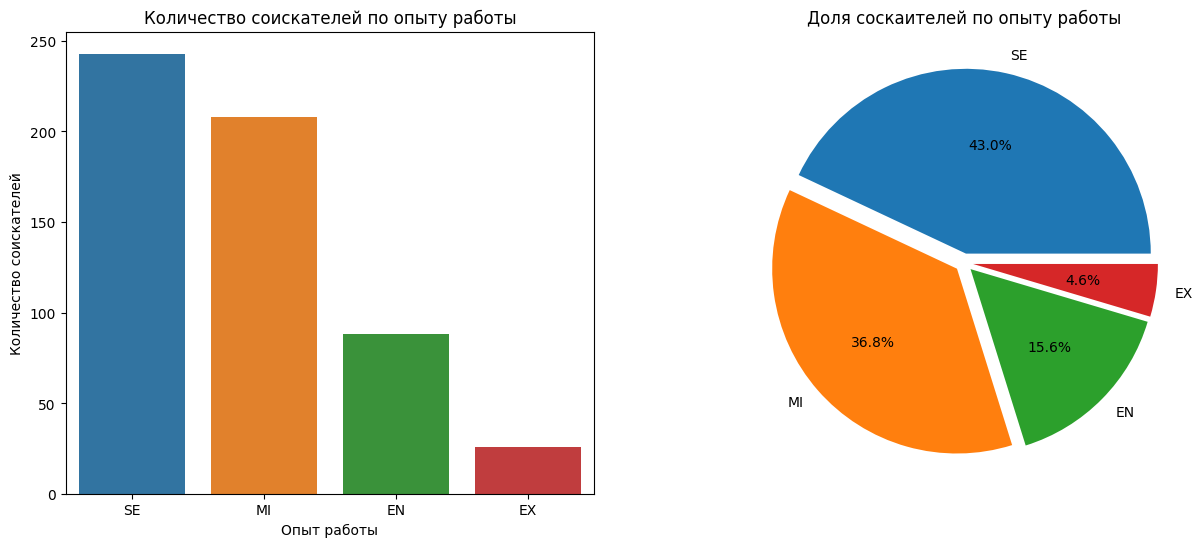

In [119]:
# построим график частоты и круговую диаграмму для признака "Опыт работы"
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x=experience_level.index, y=experience_level.values, ax=axes[0])
axes[0].set(xlabel='Опыт работы', ylabel='Количество соискателей')
axes[0].set_title('Количество соискателей по опыту работы')

axes[1].pie(
    experience_level,
    labels=experience_level.index,
    autopct='%.1f%%',
    explode = [0.05, 0.05, 0.05, 0.05])
axes[1].set_title('Доля соскаителей по опыту работы');

**Вывод:** наибольшее количество соискателей с опытом работы "Senior-level/Expert", доля данной группы составляет 43%. Наименьшую долю занимают соискатели с опытом работы "Executive-level/Director" (4.6%)

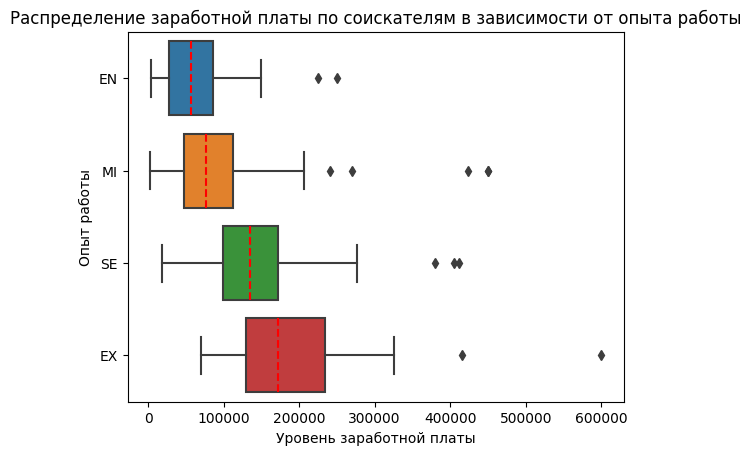

In [121]:
# графики распределения годовой заработной платы в зависимости от опыта работы
fig = plt.plot(figsize=(12,4))

boxplot = sns.boxplot(data=data, x = 'salary_in_usd', y = 'experience_level', orient='h', medianprops = {'color': 'red', 'linestyle': '--'}, order=['EN', 'MI', 'SE', 'EX'])
boxplot.set_title('Распределение заработной платы по соискателям в зависимости от опыта работы')
boxplot.set(ylabel='Опыт работы', xlabel='Уровень заработной платы');

In [122]:
data.groupby('experience_level')['salary_in_usd'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
experience_level,,,,,,,,
EN,88.0,61643.32,44395.54,4000.0,27505.00,56500.0,85425.75,250000.0
EX,26.0,199392.04,117071.26,69741.0,130006.50,171437.5,233750.00,600000.0
MI,208.0,87793.00,64118.97,2859.0,47163.75,76940.0,112075.00,450000.0
SE,243.0,138374.88,59955.97,18907.0,99531.50,135000.0,171881.00,412000.0


**Вывод:** распределение заработной платы различно по опыту работы, то есть мы можем наблюдать зависимость выплаты заработной платы от стажа/ опыта соискателей. Для определения статистической значимости необходимо провести статистические тесты.

**Есть ли зависимость между Опытом работы и заработной платой?**  
*Нулевая гипотеза* ($H_0$): размер заработной платы у соискателей не зависит от опыта работы
$$ H_0 : μ_1 = μ_2 = μ_3 = μ_4 $$
*Альтернативная гипотеза *($H_1$): размер заработной платы у соискателей зависит от опыта работы
$$ H_1 : μ_1 \neq μ_2 \neq μ_3 \neq μ_4 $$ 

In [124]:
# значения заработных плат по годам
salary_en = data.loc[data['experience_level']=='EN', 'salary_in_usd']
salary_mi = data.loc[data['experience_level']=='MI', 'salary_in_usd']
salary_se = data.loc[data['experience_level']=='SE', 'salary_in_usd']
salary_ex = data.loc[data['experience_level']=='EX', 'salary_in_usd']

# проводим тест Шапиро-Уилка
print('Опыт работы EN:')
result = stats.shapiro(salary_en)
decision_normality(result[1])

print('Опыт работы MI:')
result = stats.shapiro(salary_mi)
decision_normality(result[1])

print('Опыт работы SE:')
result = stats.shapiro(salary_se)
decision_normality(result[1])

print('Опыт работы EX:')
result = stats.shapiro(salary_ex)
decision_normality(result[1])

Опыт работы EN:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Опыт работы MI:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Опыт работы SE:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Опыт работы EX:
p-value = 0.001
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Размер сзаработной платы»? — Количественный.
* Сколько сравниваемых групп? — Четыре.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет, по одной из групп распределение не является нормальным.

Для проверки гипотезы можно использовать критерий Краскела — Уоллиса.

**Проведём тест**

In [125]:
# провдим тест
_, p = stats.kruskal(salary_en, salary_mi, salary_se, salary_ex)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**: есть основания утверждать, что заработная плата зависит от опыта работы соискателя.